In [59]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [60]:
import sys
import keras
print('Python: {}'.format(sys.version))
print('Keras: {}'.format(keras.__version__))

Python: 3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]
Keras: 2.6.0


In [61]:
# loading the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [62]:
# determining the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [63]:
# A single image
print(X_train[0].shape)

(32, 32, 3)


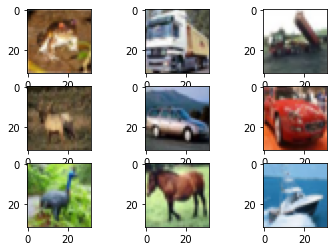

In [65]:
# creating a grid of 3*3 images
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i]
    plt.imshow(img)
    
# showing the plot
plt.show()

In [23]:
# preprocessingthe dataset

# fixing random seed for reproducibility
seed = 6
np.random.seed(seed)

#load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [25]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [67]:
# [6] = [0,0,0,0,0,0,1,0,0,0] one-hot vector

#hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]
print(num_classes)

print(Y_train.shape)
print(Y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [68]:
# starting by importing necessary function
from tensorflow.keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD

In [84]:
# defining the model function

def allcnn(weights = None):
    model =Sequential()
    
    # adding model layers
    model.add(Conv2D(96, (3,3), padding = 'same', input_shape = (32, 32 , 3)))
    model.add(Activation('relu')) 
    model.add(Conv2D(96, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3,3), padding = 'same', strides = (2, 2)))
    model.add(Dropout(0.5))
              
    model.add(Conv2D(192, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3,3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))
              
    model.add(Conv2D(192, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1,1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1,1), padding = 'valid'))
              
    # adding Global Average Pooling layer with softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    #load the weights 
    if weights:
              model.load_weights(weights)
    
    # return the model
    return model
              

In [85]:
# defining hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

#building model
model = allcnn()

#defining optimizer and compile model
sgd = SGD(lr = learning_rate, decay =weight_decay, momentum = momentum, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics =['accuracy'])

#printing model summary
print(model.summary())

# defining additional training parameters
epochs = 350
batch_size = 32

# fit the model
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_134 (Conv2D)          (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_99 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_100 (Activation)  (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 16, 16, 192)     

KeyboardInterrupt: 

In [117]:
# defining hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

#building model and defining weight
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

#defining optimizer and compile model
sgd = SGD(lr = learning_rate, decay =weight_decay, momentum = momentum, nesterov = True),
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics =['accuracy'])

#printing model summary
print(model.summary())

# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose = 1)
print("Accuracy: %.2f%%" %(scores[1]*100))


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_224 (Conv2D)          (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_169 (Activation)  (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_225 (Conv2D)          (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_170 (Activation)  (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_226 (Conv2D)          (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_52 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_227 (Conv2D)          (None, 16, 16, 192)     

KeyboardInterrupt: 

In [106]:
# making dictionary of class labels and names
classes = range(0,10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

# zip the names and classes to make a dictionary of class labels
class_labels = dict(zip(classes, names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [134]:
# genetrating batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis = -1)

#make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 156ms/step


In [135]:
print(predictions)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [136]:
# these are class probabilities, should sum to 1
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [137]:
# using np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions, axis = 1)
print(class_result)

[5 7 1 0 1 1 5 6 8]


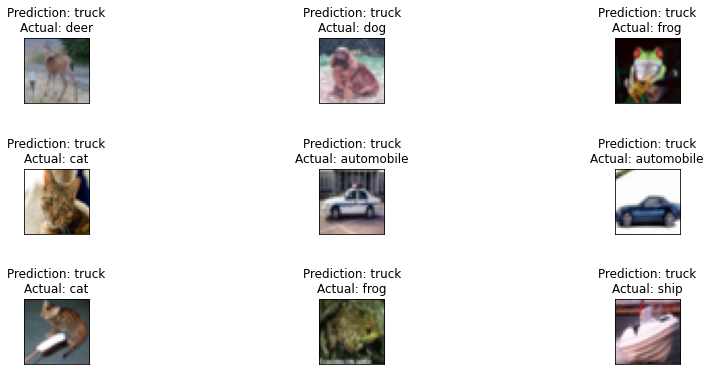

In [138]:
# creating a grid of 3*3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    
    #determine label for each prediction set title
    for key, value in class_labels.items():
        title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
        axs[i].set_title(title)
        axs[i].axes.get_xaxis().set_visible(False)
        axs[i].axes.get_yaxis().set_visible(False)
        
    # plotting the image
    axs[i].imshow(img)
    
# show the plot
plt.show()